In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston=load_boston()
X=pd.DataFrame(boston.data[:,:],columns=boston.feature_names)
y=pd.DataFrame(boston.target,columns=['MEDV'])

- このデータセットは何のデータセットであるか(何のために作成されたか、誰が作成したか、何年に作成されたか)
>D. Harrison, D.L. Rubinfeld が1978年に米国国勢調査のために収集された。後に'UCI Machine Learning Repository'の機械学習の材料として採用された。内容は，マサチューセッツ州ボストン郊外の506の住宅価格であり14カラムある。
- それぞれのカラムは何を表しているのか
>● CRIM… 犯罪発生率（人口単位） 
 ● ZN… 25,000平方フィート以上の住宅区画の割合 
 ● INDUS… 非小売業の土地面積の割合（人口単位） 
 ● CHAS… チャールズ川沿いかどうか（チャールズ川沿いの場合は1、そうでない場合は0） 
 ● NOX… 窒素酸化物の濃度（pphm単位） 
 ● RM… 1戸あたりの平均部屋数 
 ● AGE… 1940年よりも前に建てられた家屋の割合 
 ● DIS… ボストンの主な5つの雇用
 ● RAD… 幹線道路へのアクセス指数 
 ● TAX… 10,000ドルあたりの所得税率 
 ● PTRATIO… 教師あたりの生徒の数（人口単位） 
 ● B… 1000(Bk–0.63)の2乗として計算：Bkはアフリカ系アメリカ人居住者の割合（人口単位） 
 ● LSTAT… 低所得者の割合 
 ● MEDV… 住宅価格の中央値（単位1,000ドル）



In [2]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### describeメソッドを用いることで把握できたこと(考察)を記述せよ。以下の観点をすべて含めて記述すること。
- 前処理に関して気をつけるべき点
- 機械学習の手法選択に活かせること
- 機械学習の特徴選択について考えられること

>各フィーチャーにおける最大値や平均を概観することで、以下の点を考察できる。

>（１）分析に際してどのフィーチャーを採用するか。この「機械学習の特徴選択について考えられること」について、(2)および(3)に記述する。

>（２）「前処理に関して気をつけるべき点」として、採用したフィーチャーがそのままでモデルにfitできるのか。正規化が必要か。それぞれのフィーチャーの属性をみていく。
   
>_ 例えば、['CHAS']はダミー変数であるし、単位が割合[['CRIM','AGE','LSTAT']]のフィーチャーもあれば、離散的なもの['PTRATIO']、指数のもの['RAD']、濃度単位['NOX']のフィーチャーもある。

>_ さらには、同じ割合フィーチャーにおいても、人口単位なのか金額単位なのかで数値のスケールが異なるかも知れない。

>（３）上記によりデータセット内のフィーチャー属性を概観したうえで「機械学習の手法選択に活かせること」としては、作業コストの概算を想像できることが挙げられる。線形回帰モデルを検討する場合は、相当綿密なスケーリングが必要になるため、分類モデルのほうがコストがかからないかも知れない。 

### 二変数の可視化　相関

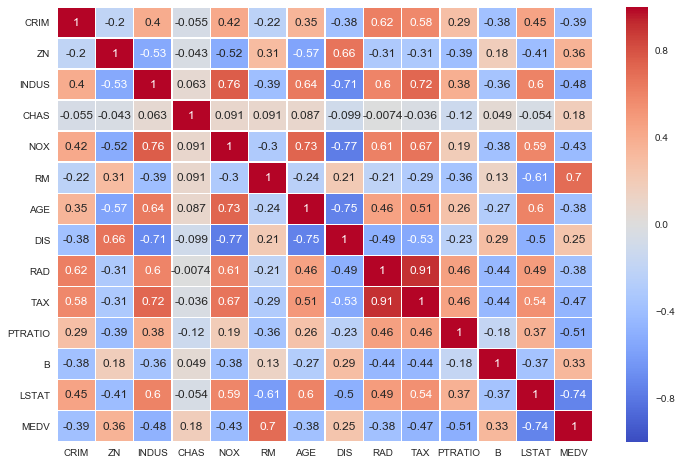

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

X_y=pd.concat(([X,y]),axis=1)
X_y.corr

plt.figure(figsize=(12,8))
sns.heatmap(X_y.corr(),annot=True,cmap='coolwarm',linewidths=.5)

### 二変数の可視化について記述せよ。
- そもそも相関とは何か。
>２つのデータ間の関係。これを-1から1までの連続値であらわしたものを相関係数という。

- MEDVにもっとも相関があると出力された変数を3つほどあげよ
>LSTAT,RM,PTRATIO

- 相関がある変数を判明させることでどのように利用できそうか考察せよ（調査せよ）
>特徴選択の際に有効な変数のあたりをつけることができる。ただし、線形回帰モデルで高相関変数のみを選択すると多重共線性の問題がでてくる可能性もある。

### 相関の注意点について記述せよ。
- 相関が正しく2変数の関係を表していない時がある、それはどのような場合か
>第三変数の存在による疑似相関である場合。

- その場合、どのような手段によって、確認するべきか
>1. 第三変数と２変数(a,b)それぞれとの回帰分析で、a,bそれぞれの残差を求める。
>2. 得られたa,bそれぞれの残差同士の相関をみて、なお有意かどうかを調べる。ただし、第三変数がはたしてどれなのか見極める必要がある。

### 二変数の可視化　プロット

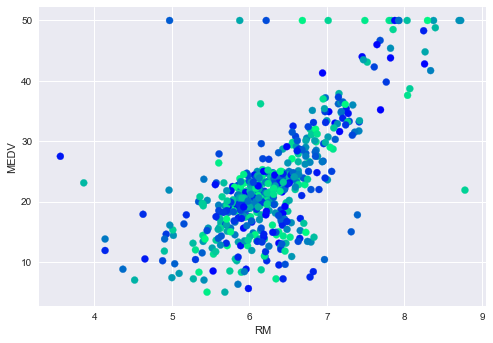

In [4]:
import numpy as np

colors=np.random.RandomState(0)
x=X['RM']
colors=np.random.rand(len(x))
plt.scatter(x,y,c=colors,cmap='winter')
plt.xlabel("RM")
plt.ylabel("MEDV")

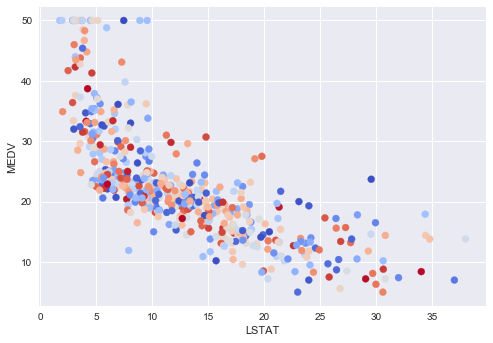

In [5]:
colors=np.random.RandomState(0)
x=X['LSTAT']
colors=np.random.rand(len(x))
plt.scatter(x,y,c=colors,cmap='coolwarm')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.grid(True)

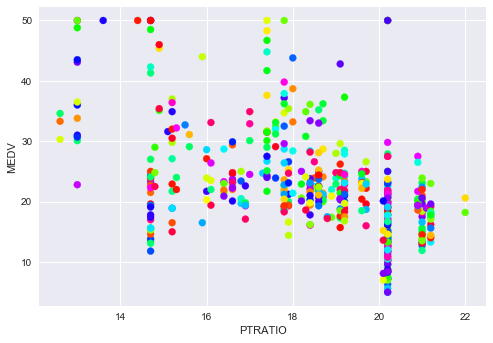

In [6]:
colors=np.random.RandomState(0)
x=X['PTRATIO']
colors=np.random.rand(len(x))
plt.scatter(x,y,c=colors,cmap='hsv')
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")
plt.grid(True)

### 二変数の可視化について記述せよ。プロット
- それぞれのプロット結果から、今回の相関はそれぞれ信用できるか記述せよ。
>RMとLSTATはプロット図からも正・負の相関が視覚的にわかるので信用できるが、PTRATIOはほとんど相関関係がわからないので信用できない。

### データセット分割

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=1)

### 学習~決定係数

In [8]:
from sklearn.tree import DecisionTreeRegressor

depth=[1,2,3]
trees=[]
score=[]
for d in depth:
    tree=DecisionTreeRegressor(max_depth=d)
    trees.append(tree.fit(X,y))
    score.append(tree.score(X,y))

score

[0.4527442007436526, 0.6955744779730269, 0.8173017379634324]

### 深さの選択
- どの深さであれば過学習しないか、そして汎用性があるか
- その検証を視覚的に行うことができる学習曲線を実装

/Users/yuusuketabata/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
/Users/yuusuketabata/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
/Users/yuusuketabata/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dt

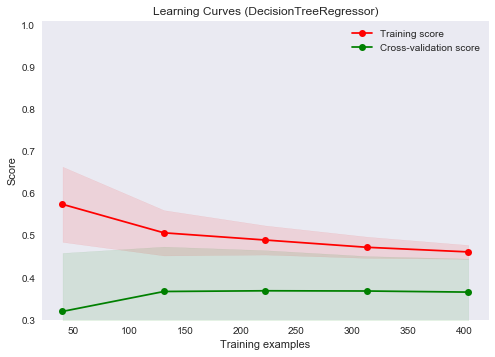

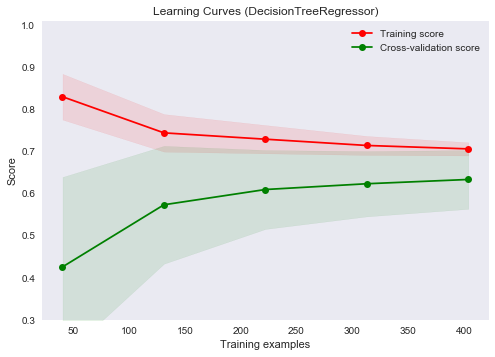

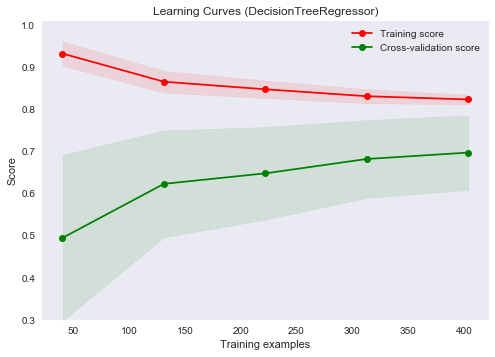

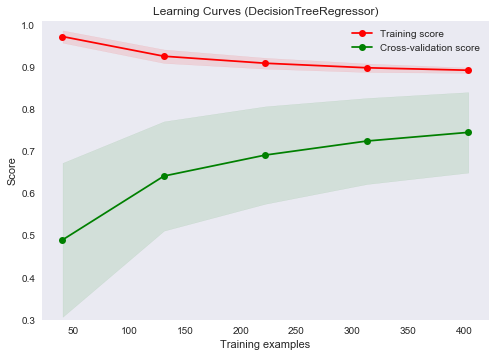

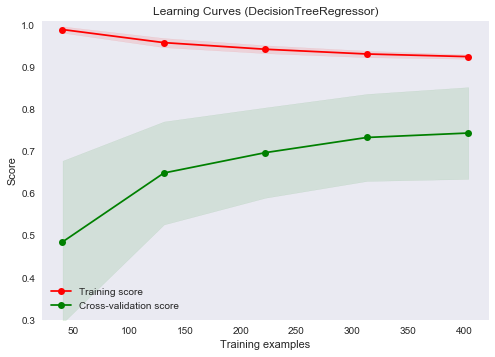

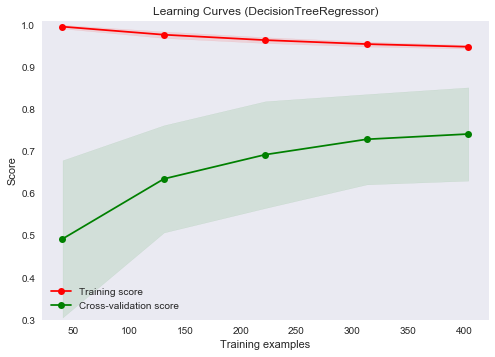

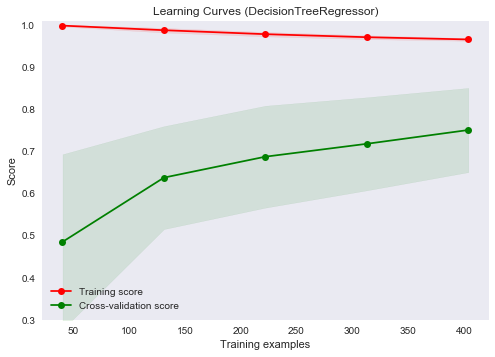

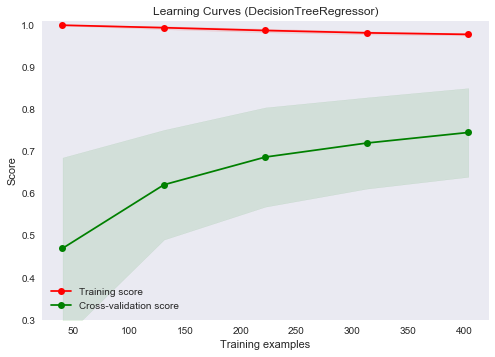

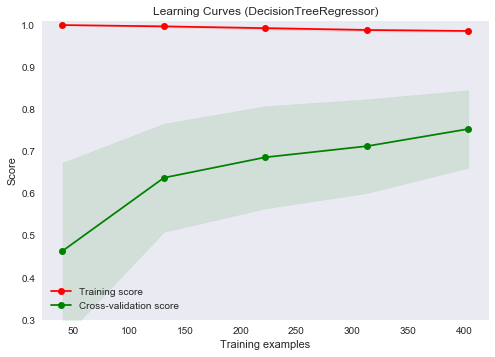

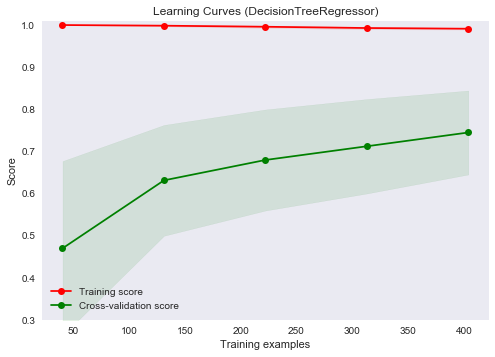

In [9]:
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,
                        n_jobs=1,train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes,train_scores,test_scores=learning_curve(
        estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes
    )
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color="r"
                    )
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color="g"
                    )
    plt.plot(train_sizes, train_scores_mean,
             'o-', color="r",
             label="Training score"
            )
    plt.plot(train_sizes, test_scores_mean,
             'o-', color="g",
             label="Cross-validation score"
            )
    
    plt.legend(loc="best")


from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

title="Learning Curves (DecisionTreeRegressor)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv=ShuffleSplit(n_splits=100,test_size=0.2,random_state=1)

for degree in range(1,11):
    estimator=DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator,title,
                        X,y,
                        ylim=(0.3,1.01),
                        cv=cv,
                        n_jobs=4
                       )

### 学習曲線について記述せよ
- High varianceとは何か
>モデルがオーバーフィッテイングしてしまっている状態のこと。featuresの予測に取りこぼしがない＝離れたfeaturesにも対応している＝視覚的には上下に大きくブレているイメージ。

- High Biasとは何か
>モデルがアンダーフィッティングしてしまっている状態のこと。train_sample数を増やしても、一向に所望するaccuracyに届かない。

- もっとも結果が良いと思われた深さをひとつ選択せよ
>depth=4

- なぜその深さが最も良いか記述せよ
>次の優先事項をもとに検討したところ、depth=4がもっともバランスが良いと視覚的に判断したため。
> 1. accuracyが最低でも0.7以上を所望
> 2. training_scoreだけが高く、crossvalidation_scoreとの乖離が拡がってないか＝過学習してないか

- その最も結果が良いと思われる深さにおいて、データ数を増やしていくと、さらに結果は良くなるか記述せよ
>データ数が320付近からどちらのスコアも傾斜が緩やかになっており、さらにデータ数を増やしたところでスコア向上の余地は少ないように見える。

## グリッドサーチ

In [10]:
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import GridSearchCV

regressor=DecisionTreeRegressor()
params={'max_depth':list(range(1,11))}
scoring_func=make_scorer(r2_score)
grid=GridSearchCV(estimator=regressor,
                  param_grid=params,
                  scoring=scoring_func,
                  cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 4}


### グリッドサーチについて記述せよ
- グリッドサーチとは何か
>ハイパーパラメータの組み合わせについて２次元の格子状（網目）のようにしらみつぶしに探す方法.

- グリッドサーチと同じようにハイパーパラメーターを探索する手法を挙げよ
>1. random search
>2. bayes optimization

- その手法は、グリッドサーチと比べて、どの点で優れているか、どのように使い分けるべきか
>1. random search:ディープラーニングなどハイパーパラメータが非常に多い場合、グリッドサーチのための組み合わせは非常に大きくなってしまうため、しらみつぶしにではなく、組み合わせをランダムに選んで試す、ランダムサーチの方がコストがかからない。
>2. bayes optimization:ランダムまで適当ではなく、もう少し時間はかかってもよいから、より精度の良いハイパーパラメータを設定したい場合に好適。

### グリッドサーチを使いこなそう
- グリッドサーチの際、Kfoldの折りたたみの回数を5回と設定しているが、それぞれ3回と10回に変えて検証せよ、また結果を元にどの折りたたみ回数がベストなのか考察せよ。
>10回がベストと考察した。理由は
>1. 折りたたみ回数が少ない＝判定するdepthが深い→過学習を判定する傾向あり。
>2. 折りたたみ回数が多い＝判定するdepthが浅くなる→過学習を判定しにくくなる。

In [11]:
#cv=3

regressor=DecisionTreeRegressor()
params={'max_depth':list(range(1,11))}
scoring_func=make_scorer(r2_score)
grid=GridSearchCV(estimator=regressor,
                  param_grid=params,
                  scoring=scoring_func,
                  cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 10}


In [12]:
#cv=10

params={'max_depth':list(range(1,11))}
scoring_func=make_scorer(r2_score)
grid=GridSearchCV(estimator=regressor,
                  param_grid=params,
                  scoring=scoring_func,
                  cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


- グリッドサーチにおいて評価方法を決定係数を使用していたが、平均二乗誤差に変更せよ

In [13]:
#score=mean_squared_error

from sklearn.metrics import mean_squared_error

regressor=DecisionTreeRegressor()
params={'max_depth':list(range(1,11))}
scoring_func=make_scorer(mean_squared_error)
grid=GridSearchCV(estimator=regressor,
                  param_grid=params,
                  scoring=scoring_func,
                  cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 1}


## テスト
- 最後にテストデータを使用して、テストを行いましょう。グリッドサーチによって求めた深さの探索木で、学習を行い、最後に決定係数を求めます。(0.8以上の数値がでていれば合格です。)

In [14]:
from sklearn.model_selection import KFold

kfold=KFold(n_splits=10,random_state=1)
params={'criterion':['mse','friedman_mse','mae'],
        'max_depth':list(range(1,11)),
        'min_samples_split':[2,3,5],
        'min_samples_leaf':[1,5,8],
       }
scoring_func=make_scorer(r2_score)
grid=GridSearchCV(estimator=regressor,
                  param_grid=params,
                  scoring=scoring_func,
                  cv=kfold)
grid.fit(X_train,y_train)
print(grid.best_params_)
print('-'*40)

grid_best=grid.best_estimator_

print('score %.3f' %grid_best.score(X_test,y_test))

{'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
----------------------------------------
score 0.858
